The data is a structure dataset pull from the Kowope Mart’s database with few important features that can be used to predict defaulters in retail network. The data sample has been split into train and test with a volume of 56,000 and 24,000.

Loading the train dataset first...separation of concerns.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Loading of our dataset in the notebook, the dataset was uploaded on google drive while the google drive was mounted on google colab for easy assessibility of the data.

In [5]:
we_test = pd.read_csv("Test.csv")
we_train = pd.read_csv("Train.csv")

In [6]:
we_test.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN


In [7]:
we_test.shape

(24000, 51)

In [8]:
we_train.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.80573,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes


In [9]:
we_train.shape

(56000, 52)

Up there we can see that the test dataset has 24000 rows and 51 columns while the train dataset has 56000 rows and 52columns.

**We will start our analysis by wokring with train and test dataset simultaneously but priority at this cleaning stage will be towards train dataset has it is the most important of the two for the loan prediction**

Since no one will ever be considered for loan because of their application_ID, it's rather not so useful for the prediction model, hence we will have to drop it.

In [10]:
we_train.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.80573,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes


In [11]:
we_test.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN


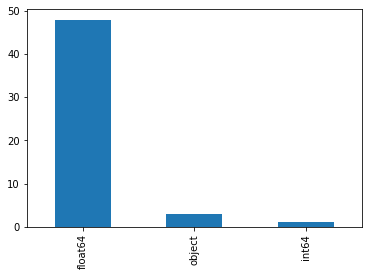

In [12]:
pp = pd.value_counts(we_train.dtypes)
pp.plot.bar()
plt.show()

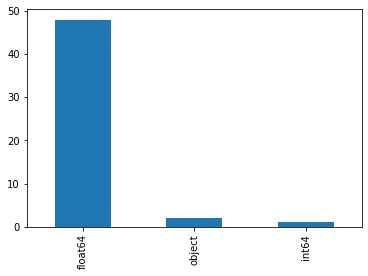

In [13]:
pp = pd.value_counts(we_test.dtypes)
pp.plot.bar()
plt.show()

Trying to check out for the missing values and non-appearances in both the test and train datasets.

In [14]:
we_train.isna().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [15]:
we_test.isna().sum()

Applicant_ID        0
form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field

To a reasonable extent, dropping the columns involving the missing values will destroy our dataset and make our model perform very poorly, hence, we will rather fill the columns with medians for numerical datasets and mode for the categorical variables.

Therefore, a function is written to satisfy this motive even thoug their is an sklearn function that does it with a one or two liners.

In [16]:
def fillna(df:pd.DataFrame) -> pd.DataFrame:

  num_cols=df.select_dtypes(include=['float64', 'int64']).columns.to_list()
  print(len(num_cols))
  obj_cols=df.select_dtypes(include=['object']).columns.to_list()

  for col in num_cols:
    if col == 'default_status':
      pass
    median = df[col].median() 
    df[col] = df[col].fillna(median)


  for col in obj_cols:
    if col == 'default_status':
      pass
    mode = df[col].mode()
    df[col] = df[col].fillna(mode)


  return df

In [17]:
we_train_now = fillna(we_train)
we_test_now = fillna(we_test)

49
49


In [18]:
we_train_now.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,318.124292,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,0.0,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,115533.0,956940.0,963942.0,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,318.124292,1.513370,0.011640,yes


In [19]:
we_test_now.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,117.9840,0.825000,1.01,0.800000,0.0,0.0,charge,313.175396,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,313.175396,0.504974,0.043525
2,Apcnt_1000052,3484.0,0.27505,0.0600,0.0000,0.0,115533.0,2719888.0,959468.5,5529829.5,...,117.9840,0.220000,0.00,0.592100,0.0,0.0,charge,313.175396,0.000000,0.168000


Next is to convert our categorical variable into numerical inorder to be able to access it efficiently and further engineer it.

we need to know the levels firstly.

In [20]:
we_train_now['form_field47'].unique()

array(['charge', 'lending'], dtype=object)

In [21]:
product_no = {"charge": 1, "lending":2}
product_no.values()

dict_values([1, 2])

In [22]:
we_train_now['form_field47'] = we_train_now['form_field47'].map(product_no)
we_train_now['form_field47'].tail(3)

55997    2
55998    1
55999    1
Name: form_field47, dtype: int64

In [23]:
we_train_now['form_field47'].value_counts()

1    36373
2    19627
Name: form_field47, dtype: int64

In [24]:
we_train_now['default_status'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
status = {"no": 0, "yes": 1}
status.values()

dict_values([0, 1])

In [26]:
we_train_now['default_status'] = we_train_now['default_status'].map(status)
we_train_now['default_status'].value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

Test.csv has just one categorical column, the form_field47, lets perform the same operation on it.

In [27]:
we_test_now['form_field47'].unique()

array(['charge', 'lending'], dtype=object)

In [28]:
product_nm = {"charge": 1, "lending":2}
product_nm.values()

dict_values([1, 2])

In [29]:
we_test_now['form_field47'] = we_test_now['form_field47'].map(product_nm)
we_test_now['form_field47'].tail(3)

23997    1
23998    1
23999    1
Name: form_field47, dtype: int64

On changing the whole categorical variable to numeric and all missing values replaced, let's see what how datasets look like.

In [30]:
we_train_now.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,1,318.124292,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,0.0,0.0,1,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,115533.0,956940.0,963942.0,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,1,318.124292,1.513370,0.011640,1


In [31]:
we_train_now.shape

(56000, 52)

In [32]:
we_test_now.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,117.9840,0.825000,1.01,0.800000,0.0,0.0,1,313.175396,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,2,313.175396,0.504974,0.043525
2,Apcnt_1000052,3484.0,0.27505,0.0600,0.0000,0.0,115533.0,2719888.0,959468.5,5529829.5,...,117.9840,0.220000,0.00,0.592100,0.0,0.0,1,313.175396,0.000000,0.168000


In [33]:
we_test_now.shape

(24000, 51)

Removing the target variable column from the train dataset so that we can have equal number of columns for test and train to avoid mismatch error.

Then reassigning the dropped variable and the remainder dataset into different containing variable. Our default status is now saved in "y".

In [34]:
X, y = we_train_now.drop(columns=['default_status']), we_train_now['default_status']

In [35]:
X

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,...,118.4415,0.392854,2.02,0.711632,0.0,0.0,1,318.124292,1.129518,0.044335
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,...,118.4415,0.314281,8.08,0.183584,0.0,0.0,1,349.805730,1.620483,0.322436
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,115533.0,956940.0,963942.0,192944.0,...,118.4415,0.162965,18.18,0.791136,0.0,0.0,1,318.124292,1.513370,0.011640
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,...,118.4415,0.488884,2.02,0.685168,0.0,0.0,1,89.940100,0.664452,0.082729
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,...,118.4415,0.275000,12.12,0.438168,0.0,0.0,1,97.887502,1.427891,0.045630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,...,118.4415,0.000000,9.09,0.730040,0.0,0.0,2,591.048913,0.000000,0.241598
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,115533.0,927765.0,963942.0,5506295.0,...,136.5135,0.297913,30.30,0.498208,0.0,0.0,2,318.124292,0.000000,0.170400
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,...,118.4415,0.550000,3.03,0.450512,0.0,0.0,2,1252.474467,2.000000,0.163153
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,115533.0,3458599.0,963942.0,115533.0,...,150.0000,0.942854,0.00,0.705048,1.0,0.0,1,318.124292,0.000000,0.002997


In [36]:
y

0        0
1        0
2        1
3        0
4        0
        ..
55995    0
55996    1
55997    0
55998    0
55999    0
Name: default_status, Length: 56000, dtype: int64

Now, to anticipate a effective model, we need to carry out some certain operations on it, part of it trying to make our data normally distributed by doing the natural logarithm function on it.

In [37]:
X.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,118.4415,0.392854,2.02,0.711632,0.0,0.0,1,318.124292,1.129518,0.044335
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,118.4415,0.314281,8.08,0.183584,0.0,0.0,1,349.805730,1.620483,0.322436
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,115533.0,956940.0,963942.0,192944.0,...,118.4415,0.162965,18.18,0.791136,0.0,0.0,1,318.124292,1.513370,0.011640


In [38]:
train_, app_id = X.drop(columns=['Applicant_ID']), X['Applicant_ID']


In [39]:
test_, app_id1 = we_test_now.drop(columns=['Applicant_ID']), we_test_now['Applicant_ID']

In [40]:
train_.shape

(56000, 50)

In [41]:
app_id.shape

(56000,)

Applicant_ID was dropped because it's a string and the distplot() function wont work on it.

/home/wizardcalidad/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


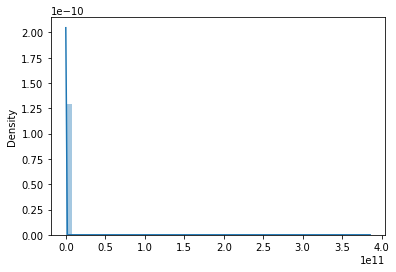

In [42]:
sns.distplot(train_)
plt.show()

/home/wizardcalidad/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


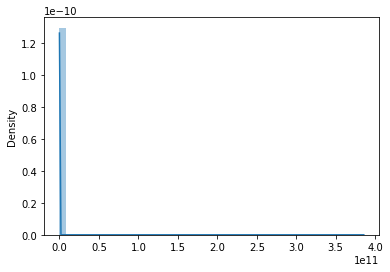

In [43]:
sns.distplot(test_)
plt.show()

/home/wizardcalidad/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


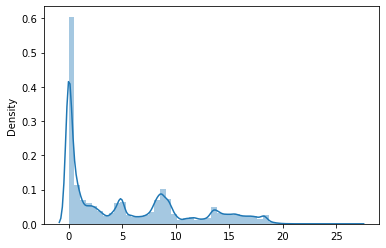

In [44]:
X = np.log1p(train_)
sns.distplot(X)
plt.show()

/home/wizardcalidad/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


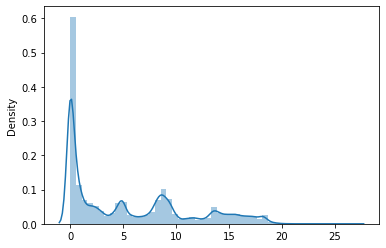

In [45]:
we_test_new = np.log1p(test_)
sns.distplot(we_test_new)
plt.show()

We will hence look for outliers in our datasets.

There are plenty of them already as you see.

In [46]:
X.describe().head(3)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,8.156968,0.348111,0.445610,0.221124,0.232682,10.395727,14.086571,13.228307,15.268675,13.217302,...,4.719113,0.271711,1.664201,0.440815,0.021158,0.044851,0.835255,6.041331,0.472158,0.586795
std,0.052702,0.356016,0.638379,0.638540,0.798896,4.343351,3.227307,2.899934,1.899116,5.388685,...,0.350369,0.271884,0.917042,0.125057,0.125290,0.181081,0.193458,2.657328,0.628247,2.312276


In [47]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75) #for train dataset

q1 = we_test_new.quantile(0.25)
q3 = we_test_new.quantile(0.75)     #for test dataset

Using interquantile range to show the outliers in the train dataset.

In [48]:
IQR = Q3 - Q1
IQR

form_field1     0.069963
form_field2     0.439131
form_field3     0.820132
form_field4     0.000000
form_field5     0.000000
form_field6     2.155927
form_field7     2.051305
form_field8     1.969411
form_field9     2.036383
form_field10    3.351544
form_field11    0.000000
form_field12    1.882978
form_field13    2.781579
form_field14    1.067114
form_field15    0.326844
form_field16    0.000000
form_field17    0.000000
form_field18    0.000000
form_field19    0.693147
form_field20    0.693147
form_field21    0.644967
form_field22    0.789113
form_field23    0.000000
form_field24    1.253715
form_field25    0.912470
form_field26    1.180124
form_field27    1.098091
form_field28    6.904027
form_field29    0.790061
form_field30    0.152519
form_field31    0.000000
form_field32    1.690632
form_field33    1.830678
form_field34    0.000000
form_field35    0.000000
form_field36    0.887303
form_field37    1.466337
form_field38    0.955511
form_field39    0.000000
form_field40    0.000000


Using interquantile range to show the outliers in the test dataset.

In [49]:
iqr = q3 - q1

iqr

form_field1     0.071664
form_field2     0.442233
form_field3     0.829708
form_field4     0.000000
form_field5     0.000000
form_field6     2.187161
form_field7     2.072996
form_field8     2.102779
form_field9     2.068676
form_field10    3.413164
form_field11    0.000000
form_field12    1.913424
form_field13    2.788313
form_field14    1.067114
form_field15    0.342687
form_field16    0.000000
form_field17    0.000000
form_field18    0.000000
form_field19    0.693147
form_field20    0.693147
form_field21    0.644348
form_field22    0.790699
form_field23    0.000000
form_field24    1.287388
form_field25    0.929400
form_field26    1.180124
form_field27    1.130432
form_field28    6.904027
form_field29    0.803507
form_field30    0.142508
form_field31    0.000000
form_field32    1.699482
form_field33    1.838279
form_field34    0.000000
form_field35    0.000000
form_field36    0.887303
form_field37    1.466337
form_field38    0.955511
form_field39    0.000000
form_field40    0.000000


If we would better visualize the outliers, using something like boxplot, scatterplot etc would have been better. 

In [50]:
# X.boxplot(column='form_field1', by='form_field2')
# plt.show()

In the case of the graph up there, it plotted credit worthiness of an applicant using their risk scores as a metric...there are certain outliers in form of molecules edging lower or higher than the heatmap.

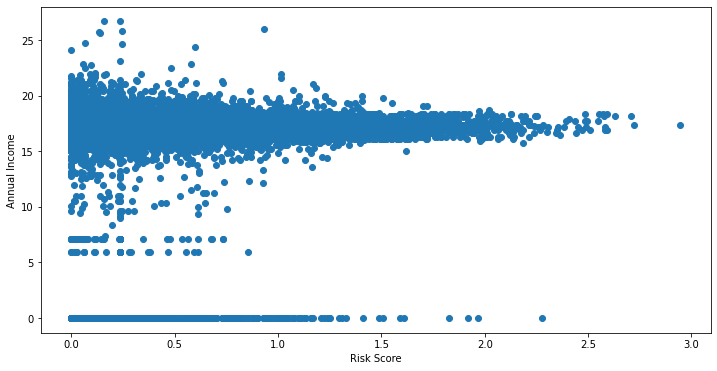

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(X['form_field2'], X['form_field14'])
ax.set_xlabel('Risk Score')
ax.set_ylabel('Annual Income')
plt.show()

Same goes for this visual which is a result of plotting Risk Score against Annual Income of the applicant.

Outliers clearly stood out.

Removing the outliers can be extremely adverse on our model so we have to replace it with the median, we didnt use mean because it is affected by outliers too. However, in this case, we would rather look for the 95th and the 5th percentile and change any other value above them to their respective values. A function was written to take care of that.

In [52]:
X.head(3)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,8.142354,0.250798,0.976821,0.0,0.000000,0.00000,16.184793,12.437474,15.267775,16.243241,...,4.782827,0.331355,1.105257,0.537447,0.0,0.0,0.693147,5.765581,0.755896,0.043380
1,8.148156,0.515216,0.210423,0.0,0.000000,0.00000,13.709016,13.117415,16.020903,14.744982,...,4.782827,0.273290,2.206074,0.168547,0.0,0.0,0.693147,5.860233,0.963359,0.279476
2,8.094684,0.430775,1.423349,0.0,1.985406,11.65732,13.771497,13.778787,12.170160,13.892347,...,4.782827,0.150973,2.953868,0.582850,0.0,0.0,0.693147,5.765581,0.921625,0.011572


In [53]:
def fix_outlier(data):
  for col in data:
    X_low = data[col].quantile(0.05)
    X_high = data[col].quantile(0.95)

    data[col] = data[col].mask(data[col] > X_high, X_high)
    data[col] = data[col].mask(data[col] < X_low, X_low)
  
  return data

In [54]:
X_ = fix_outlier(X)

In [55]:
X_.head(2)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,8.142354,0.250798,0.976821,0.0,0.0,0.0,16.184793,12.437474,15.267775,16.243241,...,4.782827,0.331355,1.105257,0.537447,0.0,0.0,0.693147,5.765581,0.755896,0.043380
1,8.148156,0.515216,0.210423,0.0,0.0,0.0,13.709016,13.117415,16.020903,14.744982,...,4.782827,0.273290,2.206074,0.197465,0.0,0.0,0.693147,5.860233,0.963359,0.279476


In [56]:
we_test_new = fix_outlier(we_test_new)

Then we will try to normalize our dataset as much as possible using standardscaler function from sklearn.

In [57]:
from  sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()

In [59]:
X_test_now = sc.fit_transform(we_test_new)


In [60]:
X__ = sc.fit_transform(X_)

In [61]:
X__

array([[-0.29460103, -0.26504428,  0.92948597, ..., -0.11626753,
         0.49647152, -0.76053211],
       [-0.17972694,  0.58587229, -0.36878137, ..., -0.07421875,
         0.84405755,  0.08978965],
       [-1.23840766,  0.31413673,  1.68589789, ..., -0.11626753,
         0.77413583, -0.87509082],
       ...,
       [ 0.07067413,  0.75877145, -0.72523482, ...,  0.49150322,
         1.07066328, -0.37244543],
       [-1.21425579, -0.90792401,  1.18674732, ..., -0.11626753,
        -0.7699658 , -0.8916091 ],
       [ 0.19469699,  0.16613991, -0.72523482, ...,  1.10498662,
         1.55264951,  0.94795296]])

In [62]:
X_test_now

array([[-1.47132746, -0.11976388,  2.33874727, ..., -0.11258402,
        -0.77161454, -0.87513391],
       [-1.18242977,  1.54622162,  1.59953926, ..., -0.11258402,
        -0.0926288 , -0.76109736],
       [-0.02246849, -0.2990418 , -0.62302004, ..., -0.11258402,
        -0.77161454, -0.35244128],
       ...,
       [-1.07518015, -0.89574474,  2.07134337, ..., -0.11258402,
         2.16392183, -0.35244128],
       [-0.88594933,  0.72332871,  0.78470621, ..., -1.19283235,
         0.22190961, -0.83048337],
       [-0.94488821,  0.1076522 ,  1.30052622, ..., -0.11258402,
        -0.77161454,  0.28362108]])

In [63]:
data = pd.DataFrame(X__)

In [91]:
data

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Applicant_ID
0,-0.294601,-0.265044,0.929486,-0.362723,-0.306011,-2.404226,0.974578,-0.628887,-0.041216,0.568450,...,0.251992,-0.609928,0.788286,0.0,-0.252885,-0.734577,-0.116268,0.496472,-0.760532,Apcnt_1000000
1,-0.179727,0.585872,-0.368781,-0.362723,-0.306011,-2.404226,-0.401880,-0.236237,0.453301,0.289247,...,0.028000,0.614652,-2.056550,0.0,-0.252885,-0.734577,-0.074219,0.844058,0.089790,Apcnt_1000004
2,-1.238408,0.314137,1.685898,-0.362723,2.908902,0.299041,-0.367142,0.145691,-2.075161,0.130358,...,-0.443852,1.446518,1.168198,0.0,-0.252885,-0.734577,-0.116268,0.774136,-0.875091,Apcnt_1000008
3,-0.666742,-0.566742,-0.032746,-0.362723,-0.306011,0.417029,0.276347,-0.383562,-0.086757,0.355877,...,0.509187,-0.609928,0.657902,0.0,-0.252885,-0.734577,-0.673965,0.083650,-0.630499,Apcnt_1000012
4,-0.678485,0.770229,0.532403,-0.362723,-0.306011,-0.699683,-1.197964,-0.721480,-0.830609,-0.073433,...,-0.089054,1.024096,-0.668321,0.0,-0.252885,-0.734577,-0.636746,0.716164,-0.756069,Apcnt_1000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,1.383400,-1.016932,-0.725235,-0.362723,-0.306011,0.739204,0.916967,0.974329,0.616947,0.673467,...,-1.026246,0.731980,0.877796,0.0,-0.252885,1.361327,0.158281,-0.769966,-0.137385,Apcnt_999968
55996,-0.737304,2.361915,0.097417,-0.362723,-0.306011,0.299041,-0.384356,0.145691,0.125321,0.230610,...,-0.020345,1.503607,-0.326089,0.0,-0.252885,1.361327,-0.116268,-0.769966,-0.350075,Apcnt_999972
55997,0.070674,0.758771,-0.725235,-0.362723,-0.306011,0.305204,0.379049,0.916536,-0.156451,0.050658,...,0.664371,-0.288982,-0.596807,0.0,-0.252885,1.361327,0.491503,1.070663,-0.372445,Apcnt_999980
55998,-1.214256,-0.907924,1.186747,1.859171,-0.306011,0.299041,0.347211,0.145691,-2.075161,0.347276,...,1.535818,-1.839445,0.756037,0.0,-0.252885,-0.734577,-0.116268,-0.769966,-0.891609,Apcnt_999988


In [65]:
data['Applicant_ID'] = app_id

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.2, random_state=60)

In [129]:
pipeNB = Pipeline([
      ('sc', StandardScaler()),
      ('model', LogisticRegression())
])

In [130]:
X_train_drop = X_train.drop(['Applicant_ID'], axis=1)
X_test_drop = X_test.drop(['Applicant_ID'], axis=1)

In [131]:
X_train_scale = sc.fit_transform(X_train_drop)

In [132]:
#model = LogisticRegression()
pipeNB.fit(X_train_scale, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('model', LogisticRegression())])

In [133]:
y_pred = pipeNB.predict(X_test_drop)

In [134]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [136]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[7872  608]
 [1558 1162]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      8480
           1       0.66      0.43      0.52      2720

    accuracy                           0.81     11200
   macro avg       0.75      0.68      0.70     11200
weighted avg       0.79      0.81      0.79     11200

0.8066071428571429


In [137]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
result = pd.DataFrame(data={'Applicant_ID':X_test["Applicant_ID"], 'Prediction': y_pred})


In [139]:
X_train_scale.shape

(44800, 50)

In [140]:
y_pred.shape

(11200,)

In [141]:
result.head()

,Applicant_ID,Prediction
51609,Apcnt_975192,0
52670,Apcnt_981212,0
7797,Apcnt_1044580,0
9267,Apcnt_1053024,0
18210,Apcnt_1104520,0


In [144]:
from statistics import mean, stdev 
from sklearn.model_selection import StratifiedKFold 


accuracy = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 
skf.get_n_splits(X,y) 

for train_index, test_index in skf.split(X, y):
  X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

  pipeNB.fit(X_train_fold, y_train_fold)
  result = pipeNB.score(X_test_fold, y_test_fold)
  accuracy.append(result)


# Print the output
print('List of possible accuracy:', accuracy) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
  max(accuracy)*100, '%') 
print('\nMinimum Accuracy:', 
  min(accuracy)*100, '%') 
print('\nOverall Accuracy:', 
  mean(accuracy)*100, '%') 
print('\nStandard Deviation is:', stdev(accuracy)) 

List of possible accuracy: [0.8030357142857143, 0.8035714285714286, 0.7948214285714286, 0.8023214285714285, 0.8003571428571429, 0.7992857142857143, 0.8003571428571429, 0.8073214285714285, 0.8019642857142857, 0.7980357142857143]

Maximum Accuracy That can be obtained from this model is: 80.73214285714285 %

Minimum Accuracy: 79.48214285714286 %

Overall Accuracy: 80.11071428571428 %

Standard Deviation is: 0.0033994297240830746


In [143]:
result.to_csv('result.csv', index=False) 